In [34]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [35]:
train_data=pd.read_csv('/content/counterfeit_train.csv')
test_data=pd.read_csv('/content/counterfeit_test.csv')

In [36]:
df1 = pd.DataFrame(train_data)
df1.isnull().sum() #Counterfeit_Weight having missing values-->	1166


,0
Medicine_ID,0
Counterfeit_Weight,1166
DistArea_ID,0
Active_Since,0
Medicine_MRP,0
Medicine_Type,0
SidEffect_Level,0
Availability_rating,0
Area_Type,0
Area_City_Type,0


In [37]:
#df1.isnull().sum()
df1['Medicine_Type'].value_counts()

,count
Medicine_Type,
Hreplacements,976
Antibiotics,970
Antiseptics,724
OralContraceptives,694
Antipyretics,536
Cardiac,522
Mstablizers,514
Tranquilizers,420
Analgesics,356


In [38]:
df1['Counterfeit_Sales'].min()

146.29

In [39]:
mean = df1['Medicine_MRP'].mean()
std_dev = df1['Medicine_MRP'].std()
z_scores = (df1['Medicine_MRP'] - mean) / std_dev

# Identify outliers where the absolute Z-score is greater than 3
outliers = df1[abs(z_scores) > 3]

print(outliers)

Empty DataFrame
Columns: [Medicine_ID, Counterfeit_Weight, DistArea_ID, Active_Since, Medicine_MRP, Medicine_Type, SidEffect_Level, Availability_rating, Area_Type, Area_City_Type, Area_dist_level, Counterfeit_Sales]
Index: []


In [40]:
df1.loc[:,'Area_Type':'Counterfeit_Sales':3]

,Area_Type,Counterfeit_Sales
0,DownTown,1775.5026
1,CityLimits,3069.1520
2,DownTown,2603.0920
3,DownTown,1101.7130
4,MidTownResidential,158.9402
...,...,...
6813,DownTown,2070.4520
6814,DownTown,2126.3792
6815,DownTown,2119.7212
6816,DownTown,1485.2138


In [41]:
DTest = pd.DataFrame()
DTest = df1.loc[:,'Area_Type':'Counterfeit_Sales':3]
DTest.head()

,Area_Type,Counterfeit_Sales
0,DownTown,1775.5026
1,CityLimits,3069.1520
2,DownTown,2603.0920
3,DownTown,1101.7130
4,MidTownResidential,158.9402


In [42]:
combined_counts = DTest.groupby(['Area_Type', 'Counterfeit_Sales']).size().reset_index(name='Occurrence')
combined_counts.sort_values('Counterfeit_Sales',ascending=False) #sorting in descending order


,Area_Type,Counterfeit_Sales,Occurrence
666,CityLimits,13199.9648,1
665,CityLimits,12230.5600,1
664,CityLimits,11558.1020,1
663,CityLimits,11106.6896,1
662,CityLimits,10419.5840,1
...,...,...,...
3695,MidTownResidential,149.6190,2
3694,MidTownResidential,148.2874,1
3693,MidTownResidential,147.6216,1
3692,MidTownResidential,146.9558,1


In [43]:
df1.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [44]:
df2 = pd.DataFrame(test_data)
df2

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium


In [45]:
df2.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [47]:
df1.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [48]:
df2.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type',
       'Area_dist_level'],
      dtype='object')

In [49]:
df2['Counterfeit_Sales']=np.nan

In [50]:
df2.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [51]:
df1['data'] = 'train'
df2['data'] = 'test'
df2=df2[df1.columns] # the columns in the two data frames should
#be in the same order to enable concatenation
df_all=pd.concat([df1,df2],axis=0)
df_all

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test
1701,CKE54,21.300,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test
1702,HAY13,20.400,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test
1703,ZEE32,20.000,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test


In [52]:
df_all.dtypes

,0
Medicine_ID,object
Counterfeit_Weight,float64
DistArea_ID,object
Active_Since,int64
Medicine_MRP,float64
Medicine_Type,object
SidEffect_Level,object
Availability_rating,float64
Area_Type,object
Area_City_Type,object


In [53]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          8523 non-null   object 
 1   Counterfeit_Weight   7060 non-null   float64
 2   DistArea_ID          8523 non-null   object 
 3   Active_Since         8523 non-null   int64  
 4   Medicine_MRP         8523 non-null   float64
 5   Medicine_Type        8523 non-null   object 
 6   SidEffect_Level      8523 non-null   object 
 7   Availability_rating  8523 non-null   float64
 8   Area_Type            8523 non-null   object 
 9   Area_City_Type       8523 non-null   object 
 10  Area_dist_level      8523 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
 12  data                 8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [54]:
df_all.isnull().sum()

,0
Medicine_ID,0
Counterfeit_Weight,1463
DistArea_ID,0
Active_Since,0
Medicine_MRP,0
Medicine_Type,0
SidEffect_Level,0
Availability_rating,0
Area_Type,0
Area_City_Type,0


In [55]:
df_all['Counterfeit_Weight'].isnull

<bound method Series.isnull of 0       13.100
1          NaN
2        9.025
3       11.800
4          NaN
         ...  
1700       NaN
1701    21.300
1702    20.400
1703    20.000
1704     8.080
Name: Counterfeit_Weight, Length: 8523, dtype: float64>

In [56]:
# Impute missing values in 'Counterfeit_Weight' with the mean
df_all['Counterfeit_Weight'].fillna(df_all['Counterfeit_Weight'].mean(), inplace=True)

In [57]:
df_all['Counterfeit_Weight'].isnull().sum()

0

In [58]:
df_all['Counterfeit_Sales'].fillna(df_all['Counterfeit_Sales'].mean(), inplace=True)

In [59]:
df_all.isnull().sum()

,0
Medicine_ID,0
Counterfeit_Weight,0
DistArea_ID,0
Active_Since,0
Medicine_MRP,0
Medicine_Type,0
SidEffect_Level,0
Availability_rating,0
Area_Type,0
Area_City_Type,0


In [60]:
df_all.loc[:,'SidEffect_Level':'Area_dist_level':4]

,SidEffect_Level,Area_dist_level
0,critical,Small
1,mild,Medium
2,mild,Small
3,mild,Small
4,critical,Small
...,...,...
1700,mild,Medium
1701,critical,Small
1702,mild,Unknown
1703,mild,Medium


In [61]:
from sklearn.preprocessing import LabelEncoder

# Label encode the columns with fewer unique categories
label_cols = ['Area_City_Type', 'Area_dist_level','DistArea_ID']
le = LabelEncoder()

for col in label_cols:
    df_all[col] = le.fit_transform(df_all[col])

# One-hot encode the columns with more unique categories
df_all = pd.get_dummies(df_all, columns=['Medicine_Type','Area_Type', 'SidEffect_Level'], drop_first=True)


In [62]:
import pandas as pd
from datetime import datetime
current_year = datetime.now().year  # Get the current year dynamically
df_all['Age_of_Medicine'] = current_year - df_all['Active_Since']
del df_all['Active_Since']

In [63]:
df_all

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Availability_rating,Area_City_Type,Area_dist_level,Counterfeit_Sales,data,Medicine_Type_Antacids,...,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Age_of_Medicine
0,RRA15,13.100000,8,160.2366,0.070422,0,2,1775.50260,train,False,...,False,False,False,False,False,True,False,False,False,29
1,YVV26,14.157645,5,110.4384,0.013000,2,1,3069.15200,train,False,...,False,False,False,False,False,False,False,False,True,41
2,LJC15,9.025000,8,259.4092,0.060783,0,2,2603.09200,train,False,...,False,False,False,False,False,True,False,False,True,29
3,GWC40,11.800000,8,99.9830,0.065555,0,2,1101.71300,train,False,...,False,True,False,False,False,True,False,False,True,29
4,QMN13,14.157645,4,56.4402,0.248859,0,2,158.94020,train,False,...,False,False,False,False,False,False,False,True,False,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,14.157645,5,136.5704,0.050505,2,1,2280.58348,test,False,...,False,False,False,False,False,False,False,False,True,41
1701,CKE54,21.300000,6,57.0744,0.041118,1,2,2280.58348,test,False,...,False,False,False,False,False,True,False,False,False,22
1702,HAY13,20.400000,2,182.7422,0.191273,1,3,2280.58348,test,False,...,False,False,False,False,False,True,False,False,True,19
1703,ZEE32,20.000000,3,266.9672,0.013000,2,1,2280.58348,test,False,...,False,False,False,False,False,False,True,False,True,17


In [64]:
df_all['DistArea_ID'].value_counts()

,count
DistArea_ID,
5,935
1,932
8,930
6,930
9,930
7,929
3,928
2,926
0,555


In [65]:
del df_all['Area_City_Type']

In [66]:
bins = [0, 100, 200, float('inf')]  # Price ranges: 0-100, 101-200, 201+
labels = ['Low', 'Medium', 'High']

# Create a new 'Price_Category' column based on binning
df_all['Price_Category'] = pd.cut(df_all['Medicine_MRP'], bins=bins, labels=labels)

In [67]:
# Example: One-hot encoding for 'Price_Category'
df_all = pd.get_dummies(df_all, columns=['Price_Category'], drop_first=True)
# Convert boolean columns to numeric (1 for True, 0 for False)

#df_all['Price_Category'] = df_all['Price_Category'].astype(int)

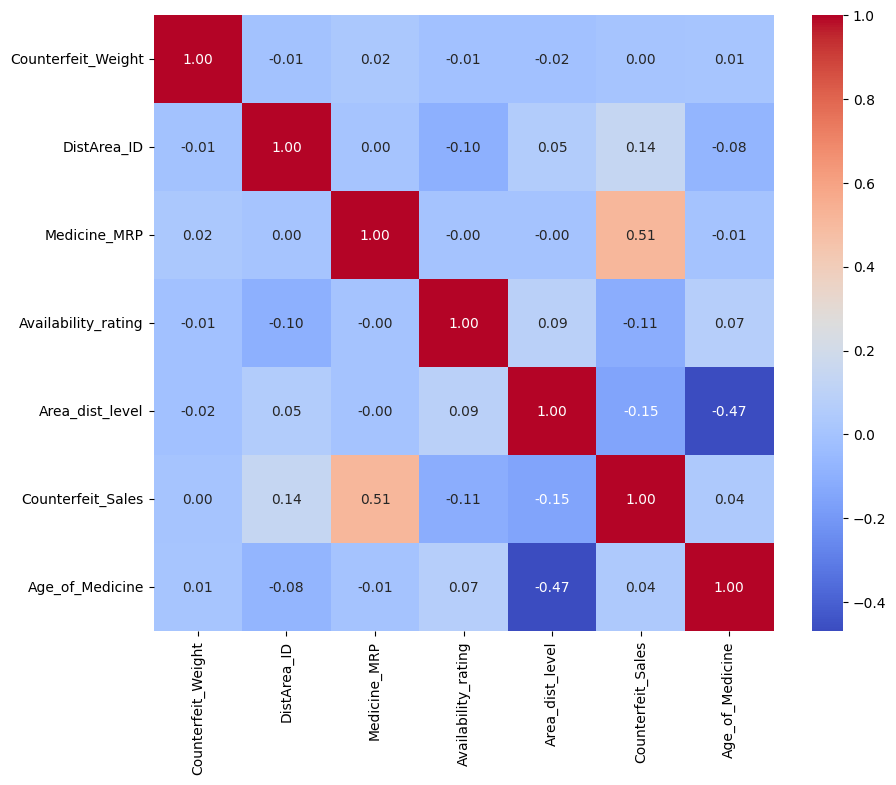

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (automatically skip string columns)
numeric_df = df_all.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [69]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 1704
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Medicine_ID                       8523 non-null   object 
 1   Counterfeit_Weight                8523 non-null   float64
 2   DistArea_ID                       8523 non-null   int64  
 3   Medicine_MRP                      8523 non-null   float64
 4   Availability_rating               8523 non-null   float64
 5   Area_dist_level                   8523 non-null   int64  
 6   Counterfeit_Sales                 8523 non-null   float64
 7   data                              8523 non-null   object 
 8   Medicine_Type_Antacids            8523 non-null   bool   
 9   Medicine_Type_Antibiotics         8523 non-null   bool   
 10  Medicine_Type_Antifungal          8523 non-null   bool   
 11  Medicine_Type_Antimalarial        8523 non-null   bool   
 12  Medicine_Ty

In [70]:
df_all[df_all.select_dtypes(include=['bool']).columns] = df_all.select_dtypes(include=['bool']).astype(int)
#convert bool dtype to int

In [71]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 1704
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Medicine_ID                       8523 non-null   object 
 1   Counterfeit_Weight                8523 non-null   float64
 2   DistArea_ID                       8523 non-null   int64  
 3   Medicine_MRP                      8523 non-null   float64
 4   Availability_rating               8523 non-null   float64
 5   Area_dist_level                   8523 non-null   int64  
 6   Counterfeit_Sales                 8523 non-null   float64
 7   data                              8523 non-null   object 
 8   Medicine_Type_Antacids            8523 non-null   int64  
 9   Medicine_Type_Antibiotics         8523 non-null   int64  
 10  Medicine_Type_Antifungal          8523 non-null   int64  
 11  Medicine_Type_Antimalarial        8523 non-null   int64  
 12  Medicine_Ty

In [72]:
df_all

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Availability_rating,Area_dist_level,Counterfeit_Sales,data,Medicine_Type_Antacids,Medicine_Type_Antibiotics,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Age_of_Medicine,Price_Category_Medium,Price_Category_High
0,RRA15,13.100000,8,160.2366,0.070422,2,1775.50260,train,0,0,...,0,0,0,1,0,0,0,29,1,0
1,YVV26,14.157645,5,110.4384,0.013000,1,3069.15200,train,0,0,...,0,0,0,0,0,0,1,41,1,0
2,LJC15,9.025000,8,259.4092,0.060783,2,2603.09200,train,0,0,...,0,0,0,1,0,0,1,29,0,1
3,GWC40,11.800000,8,99.9830,0.065555,2,1101.71300,train,0,0,...,0,0,0,1,0,0,1,29,0,0
4,QMN13,14.157645,4,56.4402,0.248859,2,158.94020,train,0,0,...,0,0,0,0,0,1,0,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,14.157645,5,136.5704,0.050505,1,2280.58348,test,0,0,...,0,0,0,0,0,0,1,41,1,0
1701,CKE54,21.300000,6,57.0744,0.041118,2,2280.58348,test,0,1,...,0,0,0,1,0,0,0,22,0,0
1702,HAY13,20.400000,2,182.7422,0.191273,3,2280.58348,test,0,0,...,0,0,0,1,0,0,1,19,1,0
1703,ZEE32,20.000000,3,266.9672,0.013000,1,2280.58348,test,0,0,...,0,0,0,0,1,0,1,17,0,1


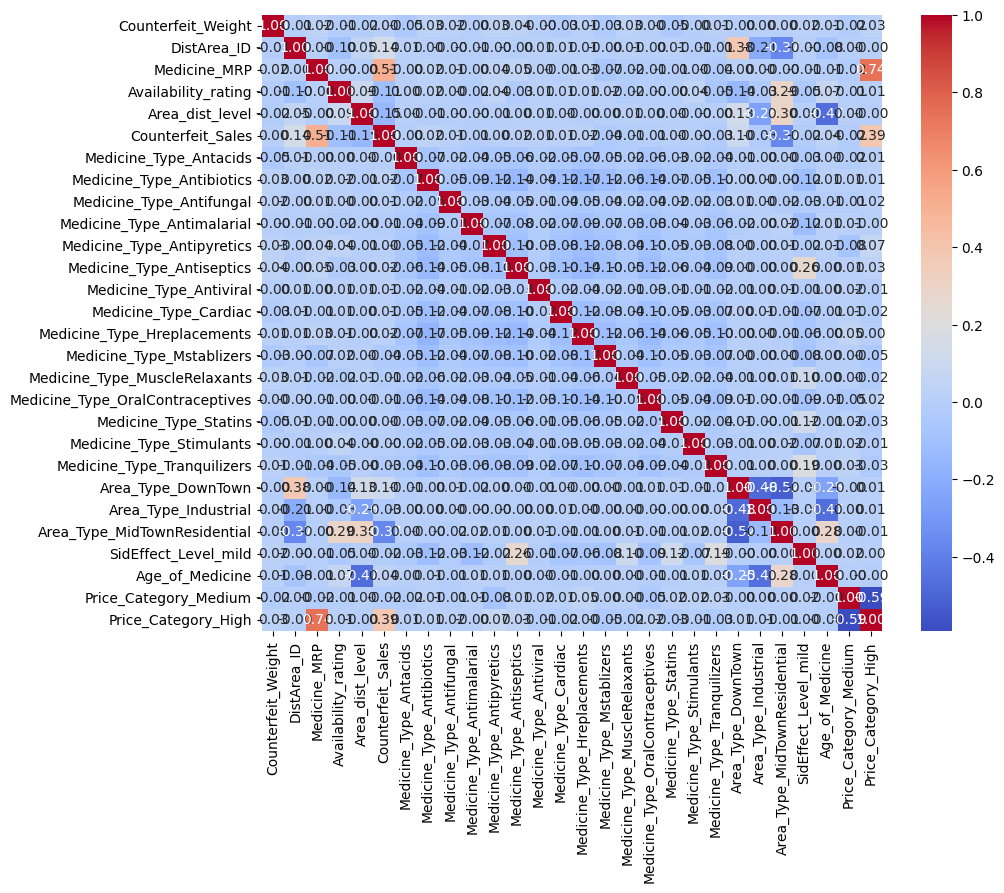

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (automatically skip string columns)
numeric_df = df_all.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [74]:
# Data preprocessing is complete - the data is in the expected format

In [75]:
#Let's separate our two data sets and remove the unnecessary columns that we added while combining them.

In [76]:
df_train=df_all[df_all['data']=='train'] # Select only those rows where the d
#ata column has the value 'train'
del df_train['data'] # Remove the data column from bd_train data frame


In [77]:
df_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Availability_rating,Area_dist_level,Counterfeit_Sales,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Age_of_Medicine,Price_Category_Medium,Price_Category_High
0,RRA15,13.100000,8,160.2366,0.070422,2,1775.5026,0,0,0,...,0,0,0,1,0,0,0,29,1,0
1,YVV26,14.157645,5,110.4384,0.013000,1,3069.1520,0,0,0,...,0,0,0,0,0,0,1,41,1,0
2,LJC15,9.025000,8,259.4092,0.060783,2,2603.0920,0,0,0,...,0,0,0,1,0,0,1,29,0,1
3,GWC40,11.800000,8,99.9830,0.065555,2,1101.7130,0,0,0,...,0,0,0,1,0,0,1,29,0,0
4,QMN13,14.157645,4,56.4402,0.248859,2,158.9402,0,0,0,...,0,0,0,0,0,1,0,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535000,8,204.1452,0.112963,2,2070.4520,0,0,0,...,0,0,0,1,0,0,1,29,0,1
6814,ACW12,20.650000,8,235.1088,0.131103,2,2126.3792,0,0,0,...,0,0,0,1,0,0,1,29,0,1
6815,OPM10,20.000000,2,193.6292,0.105096,3,2119.7212,0,0,0,...,0,0,0,1,0,0,0,19,1,0
6816,SLY12,10.180000,7,162.8682,0.099957,3,1485.2138,0,0,0,...,1,0,0,1,0,0,1,24,1,0


In [78]:
df_test=df_all[df_all['data']=='test'] # Select only those rows where the dat
#a column has the value 'test'
df_test.drop(['Counterfeit_Sales','data'],axis=1,inplace=True) # Remove the data a
#nd predicted column from df_test data frame


In [79]:
df_test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Availability_rating,Area_dist_level,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Age_of_Medicine,Price_Category_Medium,Price_Category_High
0,HLZ81,14.157645,5,85.5328,0.112747,1,0,1,0,0,...,0,0,0,0,0,0,1,41,0,0
1,ECE94,13.450000,7,257.1460,0.144446,3,0,0,0,0,...,0,0,0,1,0,0,1,24,0,1
2,SAD14,7.100000,7,98.1172,0.144221,3,0,0,0,0,...,0,0,0,1,0,0,1,24,0,0
3,EQV63,18.300000,0,135.3730,0.100388,3,0,0,0,0,...,0,0,1,0,0,1,1,28,1,0
4,AIR10,14.157645,4,112.8016,0.022585,2,0,0,0,0,...,0,0,0,0,0,1,1,41,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,14.157645,5,136.5704,0.050505,1,0,0,0,0,...,0,0,0,0,0,0,1,41,1,0
1701,CKE54,21.300000,6,57.0744,0.041118,2,0,1,0,0,...,0,0,0,1,0,0,0,22,0,0
1702,HAY13,20.400000,2,182.7422,0.191273,3,0,0,0,0,...,0,0,0,1,0,0,1,19,1,0
1703,ZEE32,20.000000,3,266.9672,0.013000,1,0,0,0,0,...,0,0,0,0,1,0,1,17,0,1


In [80]:
del df_all

# Model Implementation


In [81]:

# Divide the training data given to train and validation data frames
from sklearn.model_selection import train_test_split
ld_train1,ld_train2=train_test_split(df_train,test_size=0.2,random_state=2)
#the data set is divided into 80% train and

#20% validation data frames



In [82]:
x_train1=ld_train1.drop('Counterfeit_Sales',axis=1) # all features, except Counterfeit_Sales are present in x_train1
#x_train1=ld_train1.drop('Medicine_ID ',axis=1)
#x_train1=ld_train1.drop(columns=['Counterfeit_Sales', 'Medicine_ID'], inplace=True)
y_train1=ld_train1['Counterfeit_Sales'] # the response column Interest.Rate is assigned to y_train1

del x_train1['Medicine_ID']

In [83]:
x_train1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 1063 to 2575
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Counterfeit_Weight                5454 non-null   float64
 1   DistArea_ID                       5454 non-null   int64  
 2   Medicine_MRP                      5454 non-null   float64
 3   Availability_rating               5454 non-null   float64
 4   Area_dist_level                   5454 non-null   int64  
 5   Medicine_Type_Antacids            5454 non-null   int64  
 6   Medicine_Type_Antibiotics         5454 non-null   int64  
 7   Medicine_Type_Antifungal          5454 non-null   int64  
 8   Medicine_Type_Antimalarial        5454 non-null   int64  
 9   Medicine_Type_Antipyretics        5454 non-null   int64  
 10  Medicine_Type_Antiseptics         5454 non-null   int64  
 11  Medicine_Type_Antiviral           5454 non-null   int64  
 12  Medicine

In [84]:
y_train1.info()


<class 'pandas.core.series.Series'>
Index: 5454 entries, 1063 to 2575
Series name: Counterfeit_Sales
Non-Null Count  Dtype  
--------------  -----  
5454 non-null   float64
dtypes: float64(1)
memory usage: 85.2 KB


# Linear Regression


In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm=LinearRegression() # Create an object lm of the Linear Regression class

In [87]:
lm.fit(x_train1,y_train1) # fit the model to the data

LinearRegression()

In [88]:
 lm.intercept_ # gives where the regression line intersect with the y-axis

2334.099460645598

In [89]:
list(zip(x_train1.columns,lm.coef_)) # gives the coefficients for each of the features



[('Counterfeit_Weight', -4.83591464744941),
 ('DistArea_ID', -1.6106133288316062),
 ('Medicine_MRP', 15.087054736048273),
 ('Availability_rating', -270.11489933169116),
 ('Area_dist_level', -92.43678542719236),
 ('Medicine_Type_Antacids', 3.8944820586412354),
 ('Medicine_Type_Antibiotics', 75.69226914144679),
 ('Medicine_Type_Antifungal', 0.9909474116648308),
 ('Medicine_Type_Antimalarial', 13.212456544714717),
 ('Medicine_Type_Antipyretics', -53.774346126316644),
 ('Medicine_Type_Antiseptics', -18.702514808229353),
 ('Medicine_Type_Antiviral', 371.98108926354263),
 ('Medicine_Type_Cardiac', 88.61780597549695),
 ('Medicine_Type_Hreplacements', -22.5757854484146),
 ('Medicine_Type_Mstablizers', -3.2680655589736207),
 ('Medicine_Type_MuscleRelaxants', 114.36670536018322),
 ('Medicine_Type_OralContraceptives', 9.488539535212931),
 ('Medicine_Type_Statins', 71.27888638716912),
 ('Medicine_Type_Stimulants', 50.45520176981533),
 ('Medicine_Type_Tranquilizers', -65.78133592600926),
 ('Area_Ty

In [90]:
x_train2=ld_train2.drop('Counterfeit_Sales',axis=1)

In [91]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 5443 to 1123
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Medicine_ID                       1364 non-null   object 
 1   Counterfeit_Weight                1364 non-null   float64
 2   DistArea_ID                       1364 non-null   int64  
 3   Medicine_MRP                      1364 non-null   float64
 4   Availability_rating               1364 non-null   float64
 5   Area_dist_level                   1364 non-null   int64  
 6   Medicine_Type_Antacids            1364 non-null   int64  
 7   Medicine_Type_Antibiotics         1364 non-null   int64  
 8   Medicine_Type_Antifungal          1364 non-null   int64  
 9   Medicine_Type_Antimalarial        1364 non-null   int64  
 10  Medicine_Type_Antipyretics        1364 non-null   int64  
 11  Medicine_Type_Antiseptics         1364 non-null   int64  
 12  Medicine

In [92]:
del x_train2['Medicine_ID']

In [93]:
predicted_ir=lm.predict(x_train2) # make predictions using the validation data set



In [94]:
 print(predicted_ir[:10]) # it contains predictions for each row of the validation data set


[1016.89562971  832.89458283 3889.25589723 3678.06099595 1245.74945514
 2711.29204152 1896.36322655 4242.39675676 2420.04035979 3495.36105886]


In [95]:
from sklearn.metrics import mean_absolute_error


In [96]:
mean_absolute_error(ld_train2['Counterfeit_Sales'],predicted_ir)


831.8270429884337

# We know the tentative performance now, lets build the model on entire training to make prediction on test/production


In [97]:

y_train=df_train['Counterfeit_Sales']
#x_train=df_train.drop('Medicine_ID',axis=1)
x_train=df_train.drop('Counterfeit_Sales',axis=1)
del x_train['Medicine_ID']
x_train.info()
lm.fit(x_train,y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 0 to 6817
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Counterfeit_Weight                6818 non-null   float64
 1   DistArea_ID                       6818 non-null   int64  
 2   Medicine_MRP                      6818 non-null   float64
 3   Availability_rating               6818 non-null   float64
 4   Area_dist_level                   6818 non-null   int64  
 5   Medicine_Type_Antacids            6818 non-null   int64  
 6   Medicine_Type_Antibiotics         6818 non-null   int64  
 7   Medicine_Type_Antifungal          6818 non-null   int64  
 8   Medicine_Type_Antimalarial        6818 non-null   int64  
 9   Medicine_Type_Antipyretics        6818 non-null   int64  
 10  Medicine_Type_Antiseptics         6818 non-null   int64  
 11  Medicine_Type_Antiviral           6818 non-null   int64  
 12  Medicine_Ty

LinearRegression()

In [98]:
#x_train=df_train.drop('Counterfeit_Sales',axis=1)


In [99]:
#df_test_final.info()

In [100]:
df_test_final=df_test.drop('Medicine_ID',axis=1)
test_pred=lm.predict(x_train)
test_pred

array([2463.99847856, 3145.00711569, 4099.25570982, ..., 3050.97838881,
       2525.0602269 , 2501.46627901])

In [101]:
# final=pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)
# final['Counterfeit_Sales'] = pd.DataFrame(test_pred)
# final

In [102]:
#final['Medicine_ID']=df_test['Medicine_ID']

In [103]:
y_train

,Counterfeit_Sales
0,1775.5026
1,3069.1520
2,2603.0920
3,1101.7130
4,158.9402
...,...
6813,2070.4520
6814,2126.3792
6815,2119.7212
6816,1485.2138


In [104]:
mean_absolute_error(y_train,test_pred)

825.0592004004461

In [105]:

del df_test['Medicine_ID']
df_test

,Counterfeit_Weight,DistArea_ID,Medicine_MRP,Availability_rating,Area_dist_level,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,...,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Age_of_Medicine,Price_Category_Medium,Price_Category_High
0,14.157645,5,85.5328,0.112747,1,0,1,0,0,0,...,0,0,0,0,0,0,1,41,0,0
1,13.450000,7,257.1460,0.144446,3,0,0,0,0,0,...,0,0,0,1,0,0,1,24,0,1
2,7.100000,7,98.1172,0.144221,3,0,0,0,0,1,...,0,0,0,1,0,0,1,24,0,0
3,18.300000,0,135.3730,0.100388,3,0,0,0,0,0,...,0,0,1,0,0,1,1,28,1,0
4,14.157645,4,112.8016,0.022585,2,0,0,0,0,0,...,0,0,0,0,0,1,1,41,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,14.157645,5,136.5704,0.050505,1,0,0,0,0,0,...,0,0,0,0,0,0,1,41,1,0
1701,21.300000,6,57.0744,0.041118,2,0,1,0,0,0,...,0,0,0,1,0,0,0,22,0,0
1702,20.400000,2,182.7422,0.191273,3,0,0,0,0,0,...,0,0,0,1,0,0,1,19,1,0
1703,20.000000,3,266.9672,0.013000,1,0,0,0,0,0,...,0,0,0,0,1,0,1,17,0,1


In [106]:
Y_predict=lm.predict(df_test)
Y_predict

array([2810.98610217, 3970.73780089, 1475.89535668, ..., 2854.37513068,
       3888.19982277, 3795.91206351])

In [107]:
train_data_downsampled = y_train.sample(n=len(df_test), random_state=42)

In [108]:
mean_absolute_error(train_data_downsampled,Y_predict)

1693.9109840699878

In [109]:
import shutil
Y_predict_out=pd.DataFrame()
Y_predict_out['Counterfeit_Sales'] = pd.DataFrame(Y_predict)
Y_predict_out

,Counterfeit_Sales
0,2810.986102
1,3970.737801
2,1475.895357
3,219.442197
4,-204.053792
...,...
1700,3546.402065
1701,1064.525820
1702,2854.375131
1703,3888.199823


In [110]:
#final.to_excel('sample_submission.xlsx',index=False)
import pandas as pd
#Y_predict.to_csv('sample_submission.csv',index=False)
Y_predict_out.to_csv('my_dataframe.csv', index=False)

In [111]:
#df0 = pd.read_csv('C:\Users\VIVEK YADAV\Downloads\sample_submission (2).csv',on_bad_lines='skip')